<a href="https://colab.research.google.com/github/Dhivakar-36/Fake_News/blob/main/fraud_dedection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 📌 Step 2: Load Dataset
df = pd.read_csv('/content/FakeCovid_July2020.csv')

# 📌 Step 3: Explore Data
print("Columns:", df.columns)
print(df.head())

# ✅ Update based on actual column names
TEXT_COLUMN = 'claim'       # Use your actual text column (likely 'claim')
LABEL_COLUMN = 'fact_check' # Use your actual label column (likely 'fact_check')

# Check if those columns exist
if TEXT_COLUMN not in df.columns or LABEL_COLUMN not in df.columns:
    print("❌ Check your column names. Available columns:", df.columns)
else:
    # 📌 Step 4: Clean Text
    def clean_text(text):
        if pd.isnull(text):
            return ""
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    # Apply cleaning
    df['cleaned_text'] = df[TEXT_COLUMN].apply(clean_text)

    # Create text_length column
    df['text_length'] = df['cleaned_text'].apply(len)

    # 📌 Step 5: Count text length frequencies
    length_counts = df['text_length'].value_counts().sort_index()
    print("Text Length Counts:\n", length_counts)



Columns: Index(['ID', 'ref_category_title', 'ref_url', 'pageid', 'verifiedby',
       'country', 'class', 'title', 'published_date', 'country1', 'country2',
       'country3', 'country4', 'article_source', 'ref_source', 'source_title',
       'content_text', 'category', 'lang'],
      dtype='object')
    ID                                 ref_category_title  \
0  FC1  FALSE: The coronavirus is an amplified bacteri...   
1  FC2  FALSE: A law allows people to go for a run dur...   
2  FC3  False: Chinese converting to Islam after reali...   
3  FC4  False: Bat market and bat meat are being sold ...   
4  FC5  False: You can self-diagnose COVID-19 by holdi...   

                                             ref_url  \
0  https://www.poynter.org/?ifcn_misinformation=t...   
1  https://www.poynter.org/?ifcn_misinformation=a...   
2  https://www.poynter.org/?ifcn_misinformation=c...   
3  https://www.poynter.org/?ifcn_misinformation=b...   
4  https://www.poynter.org/?ifcn_misinformation=y..

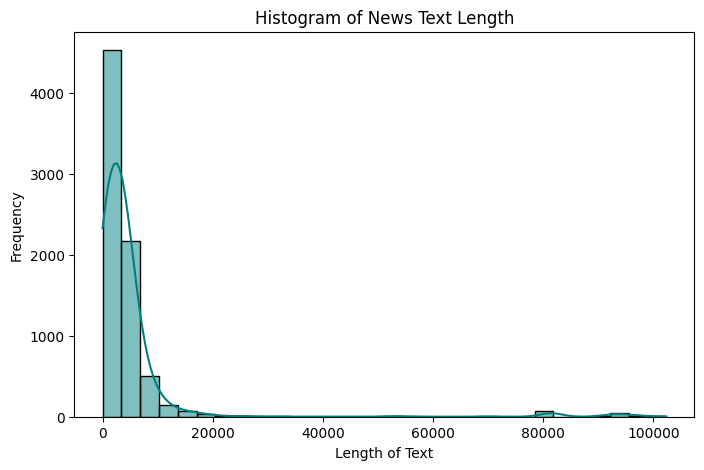

<ipython-input-65-3159febfa396>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=LABEL_COLUMN, data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


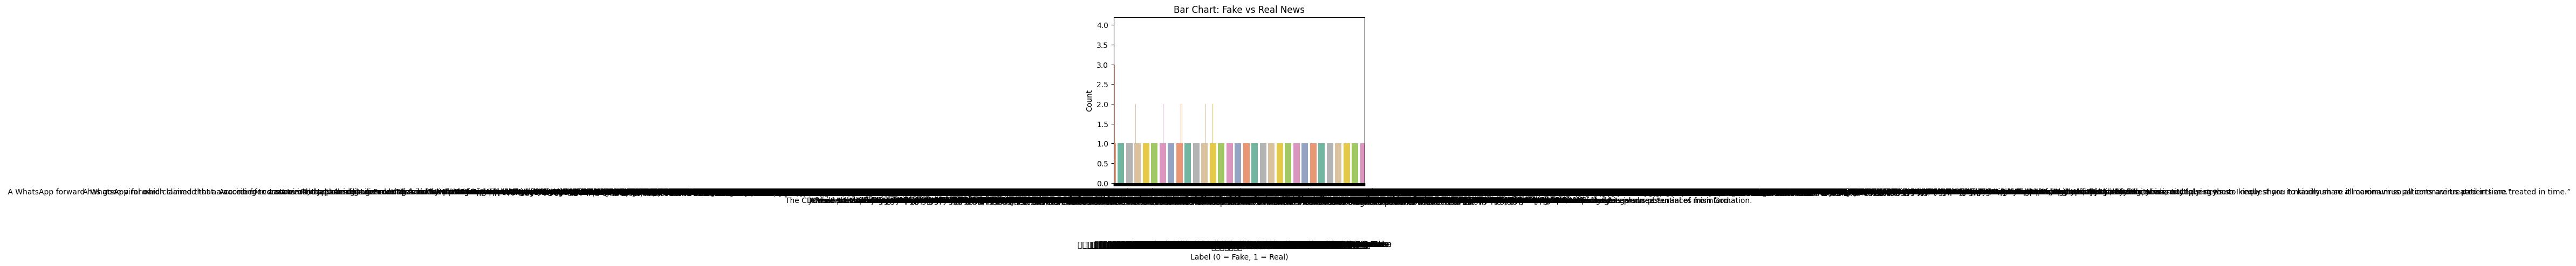

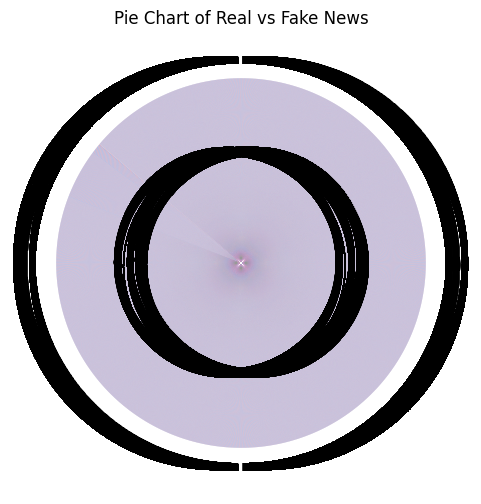

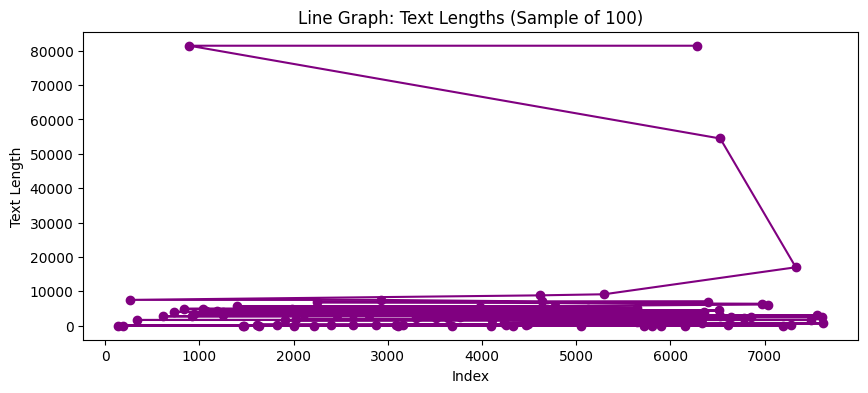

In [ ]:
# 1. Histogram – Text Length
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='teal')
plt.title("Histogram of News Text Length")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()
# 2. Bar Graph – Count of Fake vs Real
plt.figure(figsize=(6, 4))
sns.countplot(x=LABEL_COLUMN, data=df, palette='Set2')
plt.title("Bar Chart: Fake vs Real News")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()

    # 3. Pie Chart – Proportion
label_counts = df[LABEL_COLUMN].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index.map({0: 'Fake', 1: 'Real'}),
            autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title("Pie Chart of Real vs Fake News")
plt.show()

    # 4. Line Graph – Text Length Trend (sample)
df_sample = df.sample(100).sort_values('text_length')
plt.figure(figsize=(10, 4))
plt.plot(df_sample.index, df_sample['text_length'], marker='o', linestyle='-', color='purple')
plt.title("Line Graph: Text Lengths (Sample of 100)")
plt.xlabel("Index")
plt.ylabel("Text Length")
plt.show()
